In [58]:
# Problem 1: Import libraries in the notebook
# Problem 2 : Load the automobile_data.csv kept in the shared folder
# Problem 3 : Do a basic inspection and print the first and last 15 rows of your dataframe
# Problem 4 : You need to clean the data a little bit now. Replace all column values with the values ? and n.a with NaN
# Problem 5: Print the company name which manufactured the most expensive car. also the price of that car.
# Problem 6 : Calculate maximum horsepowers for each company.(df.groupby())
# problem 7 : calculate minimum wheel base by fuel type.
# Problem 8 : Create a new column for the updated price. This updated price will be calculated on top of the given price -
#  if the engine is in front, price will be same else if the engine is in rear, price will be doubled.
#  Problem 9 : Sort the cars by price columns(sort_values(by=))
# Problem 10 : Print the total number of cars manufactured by each company.value_counts()

# Problem 1: Import libraries in the notebook

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Problem 2 : Load the automobile_data.csv kept in the shared folder

In [60]:
auto = pd.read_csv("Automobile_data.csv")    #where there is python there is that file

# Problem 3 : Do a basic inspection and print the first and last 15 rows of your dataframe

In [61]:
auto.shape

(205, 26)

In [62]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   company            205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [63]:
auto.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [64]:
auto.columns

Index(['symboling', 'normalized_losses', 'company', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [65]:
auto.head(15)


,symboling,normalized_losses,company,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [66]:
auto.tail(15)

,symboling,normalized_losses,company,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90,5500,24,29,9980
191,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,24,13295
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950


# Problem 4 : You need to clean the data a little bit now. Replace all column values with the values ? and n.a with NaN


In [67]:
new_value = auto.replace(["?","n.a"],[100,None])
print(new_value)

     symboling normalized_losses      company fuel_type aspiration  \
0            3               100  alfa-romero       gas        std   
1            3               100  alfa-romero       gas        std   
2            1               100  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

In [68]:
new_value.head(10)

,symboling,normalized_losses,company,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,100,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,100,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,100,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,100,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,100,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,100,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,100


In [69]:
new_value.columns

Index(['symboling', 'normalized_losses', 'company', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

 # Problem 5: Print the company name which manufactured the most expensive car. also the price of that car.


In [70]:
new_value['price'] = new_value['price'].astype(int)
exp_car = new_value[new_value['price'].max() == new_value['price']]
print(exp_car)


    symboling normalized_losses        company fuel_type aspiration  \
74          1               100  mercedes-benz       gas        std   

   num_of_doors body_style drive_wheels engine_location  wheel_base  ...  \
74          two    hardtop          rwd           front       112.0  ...   

    engine_size  fuel_system  bore  stroke compression_ratio horsepower  \
74          304         mpfi   3.8    3.35               8.0        184   

    peak_rpm city_mpg highway_mpg  price  
74      4500       14          16  45400  

[1 rows x 26 columns]


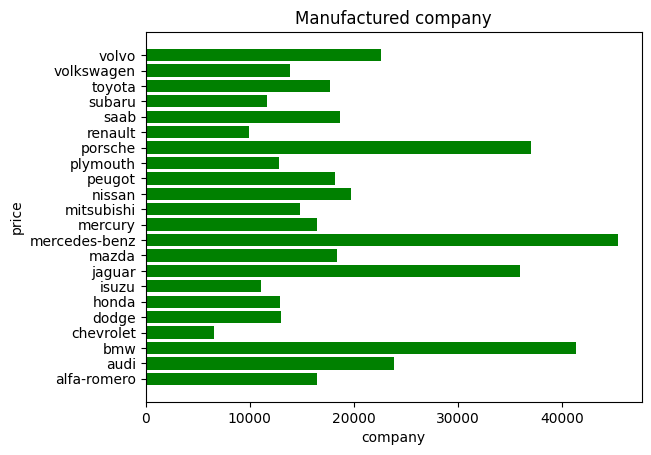

In [85]:
plt.barh(new_value.company, new_value.price, color="green")
plt.title("Manufactured company")
plt.xlabel("company")
plt.ylabel("price")
plt.show()


# Problem 6 : Calculate maximum horsepowers for each company.

In [72]:
max_hp = new_value.groupby(['company'])['horsepower'].max()
print(max_hp)

company
alfa-romero      154
audi             160
bmw              182
chevrolet         70
dodge             88
honda             86
isuzu             90
jaguar           262
mazda             84
mercedes-benz    184
mercury          175
mitsubishi        88
nissan            97
peugot            97
plymouth          88
porsche          288
renault          100
saab             160
subaru            94
toyota            92
volkswagen        90
volvo            162
Name: horsepower, dtype: object


# problem 7 : calculate minimum wheel base by fuel type.

In [73]:
min_wb = new_value.groupby(['fuel_type'])['wheel_base'].min()
print(min_wb)

fuel_type
diesel    94.5
gas       86.6
Name: wheel_base, dtype: float64


In [74]:
new_value.columns

Index(['symboling', 'normalized_losses', 'company', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

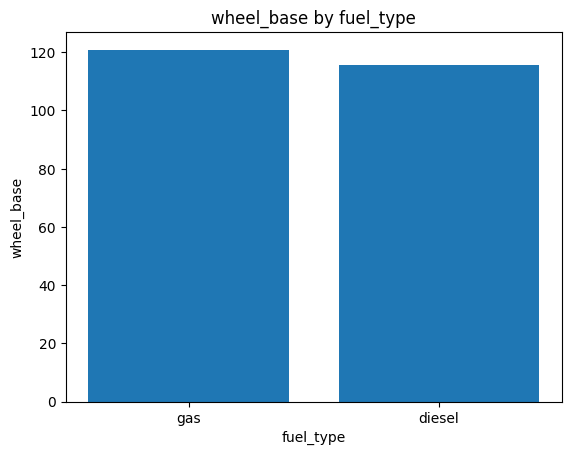

In [87]:
plt.bar(new_value.fuel_type, new_value.wheel_base)
plt.title("wheel_base by fuel_type")
plt.xlabel("fuel_type")
plt.ylabel("wheel_base")
plt.show()


# Problem 8 : Create a new column for the updated price. This updated price will be calculated on top of the given price - if the engine is in front, price will be same else if the engine is in rear, price will be doubled.

In [76]:
new_value['updated_price'] = new_value['price'].where(new_value['engine_location']=='front',new_value['price']*2)
print(new_value['updated_price'])

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: updated_price, Length: 205, dtype: int32


#  Problem 9 : Sort the cars by price columns.

In [77]:
sort_car = new_value.sort_values(by = 'price', ascending = True)
print(sort_car[['company','price']])


           company  price
45           isuzu    100
129        porsche    100
44           isuzu    100
9             audi    100
138         subaru   5118
..             ...    ...
17             bmw  36880
128        porsche  37028
73   mercedes-benz  40960
16             bmw  41315
74   mercedes-benz  45400

[205 rows x 2 columns]


# Problem 10 : Print the total number of cars manufactured by each company.

In [78]:
total_numbers_of_cars = new_value['company'].value_counts()
print(total_numbers_of_cars)

company
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64


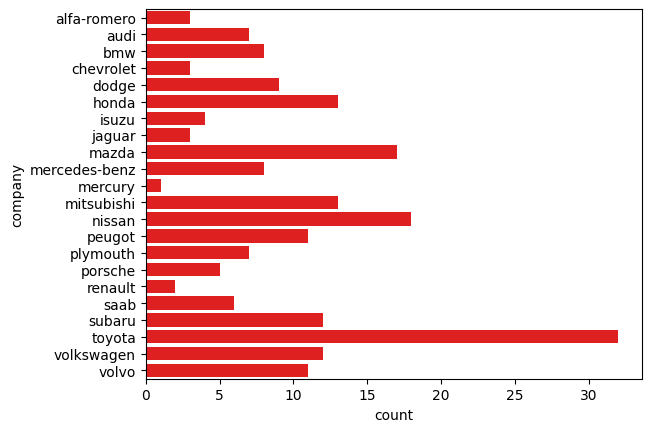

In [80]:
sn.countplot(y='company',data = new_value, color="red")
plt.show()